# Exercice 1: Création d'une base de données simple
O. Kaufmann 2018-2025.

<div class="alert alert-block alert-warning">
<b>Attention:</b><br>     Avant d'exécuter ce notebook vérifier vous utilisez le bon <b>kernel</b>.
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Pour excuter une cellule et passer à la suivante pressez SHIFT + RETURN.  <br>
    L'ordre d'excution figure à gauche de chaque cellule de code (In [...]).  <br>
    Exécuter une à une les cellules déjà présentes en prenant soin de comprendre leur contenu.  <br>
    Compléter le notebook là où c'est nécessaire.
</div>

***
## 1. Initialisation du notebook

In [1]:

# @info: Execute me to activate interactive questions
# ---------------------------------------------------

# O. KAUFMANN, 2024. 

from IPython import get_ipython
from IPython.core import magic_arguments
from IPython.core.magic import register_cell_magic
import ipywidgets as widgets
from IPython.display import HTML, clear_output
import codecs

def decode_text(text):
    return codecs.decode(text, 'hex').decode('utf')

def encode_text(text):
    return codecs.encode(codecs.encode(text,'utf8'), 'hex').decode('utf')
    
@magic_arguments.magic_arguments()
@magic_arguments.argument('--prompt', default='none', help='Encoded prompt')
@magic_arguments.argument('--answer', default='none', help='Encoded answer')
@magic_arguments.argument('--title', default='Question', help='First line of alert block')
@magic_arguments.argument('--button-label', default='Solution', help='Text to display on button')
@magic_arguments.argument('--div-type', default='alert-warning', help='Type of alert block')
    
@register_cell_magic
def display_prompt(line, cell):
    args = magic_arguments.parse_argstring(display_prompt, line)
    title = args.title
    prompt = args.prompt
    answer = args.answer
    button_label = args.button_label
    div_type = args.div_type
    def make_block(text, title=title, label=button_label, div_type=div_type):
        if title != 'none':
            return HTML(f"""<div class="alert alert-block {div_type}"> <b>{title}</b><br> {text} </div>""")
        else:
            return HTML(f"""<div class="alert alert-block {div_type}"> {text} </div>""")
    if prompt != 'none':
        display(make_block(decode_text(prompt)))
    toggle_button = widgets.ToggleButton(description=button_label)
    output = widgets.Output()
    def on_button_clicked(b):
        with output:
            if b['new']:  
                display(HTML(decode_text(answer)))
            else:
                output.clear_output()
    toggle_button.observe(on_button_clicked, 'value')
    display(toggle_button)
    display(output)

HTML("""<div class="alert alert-block alert-success"> <b>Success:</b><br>Interactive questions activated.</div>""")


Important: Exécutez-moi pour activer les questions interactives.

<div class="alert alert-block alert-success">
	<b>1.1 Chargement de l'extension sql pour jupyter</b>
</div>

Charger l'extension de Jupyter pour traiter SQL

In [2]:
%load_ext sql

<div class="alert alert-block alert-success">
	<b>1.2 Imports python</b>
</div>

In [3]:
from eralchemy import render_er
from IPython.display import Image

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Ces imports donnent accès à des fonctionnalités supplémentaires:  <br>
    - <i>render_er</i> sert à créer une représentation graphique de la base de données  <br>
    - <i>Image</i> sert à afficher des images dans le notebook
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Il est possible d'obtenir de l'aide sur une fonction dans un notebook en plaçant un '? ' avant la fonction.
</div>

In [4]:
? render_er

Signature:
 render_er(
    input,
    output,
    mode='auto',
    include_tables=None,
    include_columns=None,
    exclude_tables=None,
    exclude_columns=None,
    schema=None,
)
Docstring:
Transform the metadata into a representation.
:param input: Possible inputs are instances of:
    MetaData: SQLAlchemy Metadata
    DeclarativeMeta: SQLAlchemy declarative Base
:param output: name of the file to output the
:param mode: str in list:
    'er': writes to a file the markup to generate an ER style diagram.
    'graph': writes the image of the ER diagram.
    'dot': write to file the diagram in dot format.
    'auto': choose from the filename:
        '*.er': writes to a file the markup to generate an ER style diagram.
        '.dot': returns the graph in the dot syntax.
        else: return a graph to the format graph
:param include_tables: lst of str, table names to include, None means include all
:param include_columns: lst of str, column names to include, None means include all
:

In [ ]:

%%display_prompt --title Question 1.2.1: --prompt 416666696368657a206c276169646520737572206c6120636c6173736520496d6167652e0a202020200a --answer 20202020546170657a206c6520636f64652073756976616e742064616e7320756e652063656c6c756c6520646520636f646520766964653a200a202020203c636f64653e3f20496d6167653c2f636f64653e
# @info: Exécutez-moi pour afficher la question

Question 1.2.1: Affichez l'aide sur la classe Image.

<div class="alert alert-block alert-info">
<b>Info:</b><br>     <i>eralchemy</i> est un package</i> dont nous importons la fonction <i>render_er</i>.  <br>
    <i>IPython</i> est un package dont nous importons la classe <i>Image</i> du module <i>display</i>.
</div>

<div class="alert alert-block alert-success">
	<b>1.3 Création d'une base de donnée sqlite3</b>
</div>

Effacer le fichier de la base de données s'il existe...

In [6]:
! rm example_db.db

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Le point d'exclamation en début de ligne permet d'exécuter des commandes bash depuis le notebook
</div>

Création d'une base de données vide  

In [7]:
%sql sqlite:///example_db.db

<b>Note:</b><br>    Si le fichier existait, on pourrait se connecter à la base existante de la même façon...


<div class="alert alert-block alert-success">
	<b>1.4 Création des tables</b>
</div>

In [8]:
%%sql 
CREATE TABLE ouvrages(
    nom TEXT PRIMARY KEY,
    commune TEXT  
);

 * sqlite:///example_db.db
Done.


[]

<b>Note:</b><br>    Remarquez la syntaxe pour désigner les champs, leur type et la clé primaire. 


In [9]:
%%sql
CREATE TABLE piezometres(
    nom TEXT, 
    enregistreur TEXT,
    PRIMARY KEY(nom),
    FOREIGN KEY(nom) REFERENCES ouvrages(nom) ON DELETE CASCADE
);

 * sqlite:///example_db.db
Done.


[]

<b>Note:</b><br>    Remarquez la syntaxe pour désigner la clé primaire, la clé étrangère et la relation associée. 


In [10]:
%%sql
CREATE TABLE puits_captages(
    nom TEXT,
    type_pompe TEXT,
    PRIMARY KEY(nom),
    FOREIGN KEY(nom) REFERENCES ouvrages(nom) ON DELETE CASCADE
);

 * sqlite:///example_db.db
Done.


[]

In [11]:
%%sql
CREATE TABLE prelevements(
    nom_puits TEXT,
    annee INTEGER,
    volume REAL,
    PRIMARY KEY(nom_puits, annee),
    FOREIGN KEY(nom_puits) REFERENCES puits_captages(nom) ON DELETE CASCADE
    );

 * sqlite:///example_db.db
Done.


[]

<b>Note:</b><br>    Remarquez la syntaxe pour désigner une clé primaire constituée de plusieurs champs. 


***
## 2. Affichage du schéma de la base de données sous forme graphique

<div class="alert alert-block alert-info">
<b>Info:</b><br>     render_er crée un fichier image au format ".png" du schéma de la base de données qui est ensuite affiché dans le notebook avec la méthode Image().<br>
    Il est aussi possible de générer un schéma dans un fichier image vectoriel au format ".svg" (Scalable Vector Graphics). Le fichier ainsi créé peut être affiché avec la méthode SVG(). 
</div>

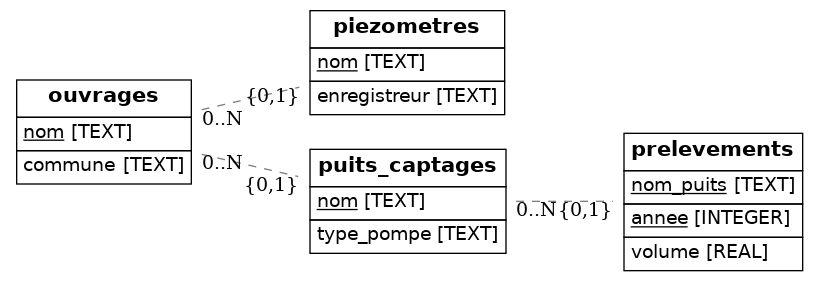

In [12]:
render_er('sqlite:///example_db.db', 'example_db_schema.png')
Image(filename='example_db_schema.png')

<div class="alert alert-block alert-warning">
<b>Question 2.0.1: </b><br>Ajoutez la définition de la table "niveaux" reprenant les niveaux relevés dans les piezomètres.<br> 
    Les champs seront nommés "nom_piezo", "date_releve" et "niveau".
</div>

In [ ]:
# Résultat attendu ci-dessous...

 * sqlite:///example_db.db
Done.


[]

<div class="alert alert-block alert-success">
	<b>2.1  Activer l'intégrité référentielle</b>
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Pour des raisons de rétro-compatibilité, l'intégrité référentielle n'est pas activée par défaut dans SQLite...  
</div>

In [14]:
%%sql
PRAGMA foreign_keys = ON;
PRAGMA foreign_keys;

 * sqlite:///example_db.db
Done.
Done.


[(1,)]

<div class="alert alert-block alert-success">
	<b>2.2 Affichage du schéma complété sous forme graphique</b>
</div>

<div class="alert alert-block alert-warning">
<b>Question 2.2.1: </b><br>Importez la classe SVG du module display du package IPython.
</div>

In [15]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e66726f6d2049507974686f6e2e646973706c617920696d706f7274205356473c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


<div class="alert alert-block alert-warning">
<b>Question 2.2.2: </b><br>Ajoutez les commandes nécessaires pour afficher le schéma complété de la base de données en utilisant le format ".svg"
</div>

In [16]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e23204472617720736368656d612066726f6d2064617461626173653c62723e0a72656e6465725f6572282773716c6974653a2f2f2f6578616d706c655f64622e6462272c20276578616d706c655f64625f736368656d612e73766727293c62723e0a53564728276578616d706c655f64625f736368656d612e73766727293c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


***
## 3. Pour aller un peu plus loin...

<div class="alert alert-block alert-success">
	<b>3.1 Affichage de la liste des tables de la base de données</b>
</div>

<div class="alert alert-block alert-info">
<b>Info:</b><br>     Dans SQlite, la table sqlite_master est une table particulière dans laquelle les informations relatives au schéma de la base de données sont stockées<br>
</div>  
</div>

<div class="alert alert-block alert-warning">
<b>Question 3.1.1: </b><br>Affichez le nom de chaque table et la requête SQL utilisée pour la créer
</div>

In [17]:

%%display_prompt --title=none --prompt 536920766f757320c3aa74726520626c6f7175c3a92865292c20616666696368657a20756e6520736f6c7574696f6e20656e207072657373616e7420737572206c6520626f75746f6e2063692d646573736f7573 --answer 3c636f64653e2573716c2053454c454354206e616d652c2073716c2046524f4d2073716c6974655f6d617374657220574845524520747970653d277461626c6527204f52444552204259206e616d653b3c2f636f64653e
# @info: Exécutez-moi pour avoir accès aux interactions

# @info: Exécutez-moi pour avoir accès aux interactions


In [ ]:

%%display_prompt --title Question 3.1.2: --prompt 5175277920612d742d696c20636f6d6d6520617574726520696e666f726d6174696f6e2073746f636bc3a96520c3a02070726f706f7320646573207461626c65732064616e732073716c6974655f6d61737465723f0a0a --answer 202020200a202020204573736179657a206c612072657175c3aa746520200a202020203c636f64653e53454c454354202a2046524f4d2073716c6974655f6d61737465723b3c2f636f64653e
# @info: Exécutez-moi pour afficher la question

Question 3.1.2: Qu'y a-t-il comme autre information stockée à propos des tables dans sqlite_master?